In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer

In [2]:
from torch.utils.data import DataLoader

In [3]:
import seaborn as sns

In [4]:
from mnli_eval import *

In [5]:
mnli = load_dataset(
    "nyu-mll/multi_nli"
).select_columns(
    ["premise", "hypothesis", "label"]
)
tokenizer = AutoTokenizer.from_pretrained("google/mobilebert-uncased")

In [6]:
data_loader = DataLoader(
    mnli["validation_matched"],
    batch_size=32,
    collate_fn=lambda batch: collate_mnli_batch(tokenizer, batch),
)

In [7]:
mean_cosine_similarities_base = aggregate_mean_cosine_similarities(
    load_mnli_pt_model(),
    load_mnli_ft_model("mnli-base.pt", mode="base"),
    data_loader,
)

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ubuntu/_2024-CS230-project/mnli_eval.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more 

UnpicklingError: invalid load key, 'v'.

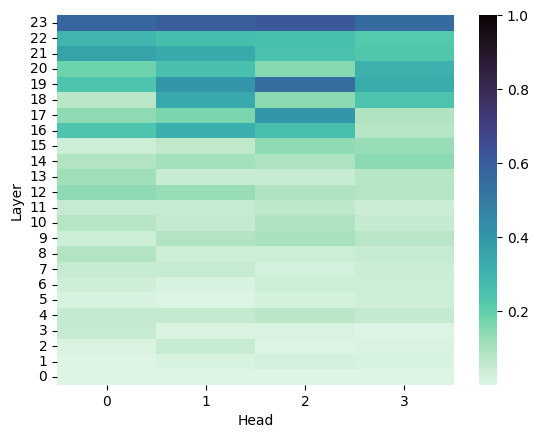

In [11]:
ax = sns.heatmap(1 - mean_cosine_similarities_base, cmap="mako_r", vmax=1.0)
ax.set_xlabel("Head")
ax.set_ylabel("Layer")
ax.invert_yaxis()

In [7]:
mean_cosine_similarities_lora = aggregate_mean_cosine_similarities(
    load_mnli_pt_model(),
    load_mnli_ft_model("mnli-lora.pt", mode="lora", lora_rank=32),
    data_loader,
)

Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of MobileBertForSequenceClassification were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 307/307 [02:38<00:00,  1.94it/s]


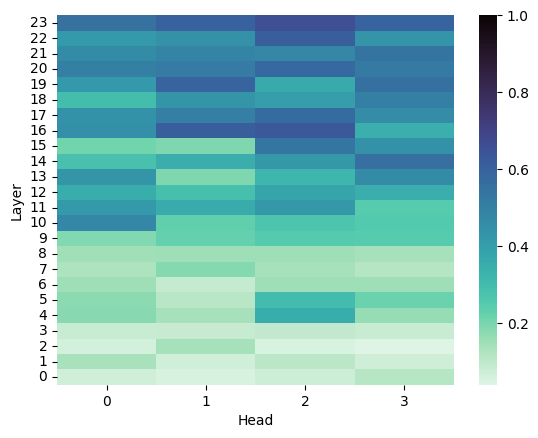

In [8]:
ax = sns.heatmap(1 - mean_cosine_similarities_lora, cmap="mako_r", vmax=1.0)
ax.set_xlabel("Head")
ax.set_ylabel("Layer")
ax.invert_yaxis()